In [238]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


from IPython.core.display import HTML

import re

from IPython.display import Image

import datacompy

In [17]:
from platform import python_version
print(python_version())

3.7.9


In [19]:
pd.__version__

'1.1.3'

In [2]:
df=pd.read_csv('/Users/balance/Desktop/udacity-review/wrngle data project/twitter-archive-enhanced.csv')

In [3]:
df.shape

(2356, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [6]:
df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [7]:
sum(df.duplicated())

0

In [9]:
df.name.value_counts().shape

(957,)

In [10]:
df.name.value_counts().head(5)

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
Name: name, dtype: int64

In [8]:
err_mask=df.name.str.contains('^[a-z]', regex=True)
df[err_mask].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [11]:
df[err_mask].name.value_counts().shape

(25,)

In [12]:
sum(df.expanded_urls.isna())

59

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [21]:
sum(df.expanded_urls.isna())

59

In [22]:
sum(df.in_reply_to_status_id.notnull())

78

In [31]:
sum(df.retweeted_status_id.notnull())

181

In [34]:
sum(df.expanded_urls.isna() & \
    (df.in_reply_to_status_id.notnull() | \
     df.retweeted_status_id.notnull()))

56

In [35]:
mask = df.expanded_urls.isna() & \
       df.in_reply_to_status_id.isna() & \
       df.retweeted_status_id.isna()

In [37]:
df[mask][['tweet_id', 'text', 'expanded_urls']]

,tweet_id,text,expanded_urls
375,828361771580813312,Beebop and Doobert should start a band 12/10 w...,NaN
707,785515384317313025,"Today, 10/10, should be National Dog Rates Day",NaN
1445,696518437233913856,Oh my god 10/10 for every little hot dog pupper,NaN


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [41]:
df[mask][['tweet_id','in_reply_to_status_id','retweeted_status_id','retweeted_status_user_id','expanded_urls']]

,tweet_id,in_reply_to_status_id,retweeted_status_id,retweeted_status_user_id,expanded_urls
375,828361771580813312,NaN,NaN,NaN,NaN
707,785515384317313025,NaN,NaN,NaN,NaN
1445,696518437233913856,NaN,NaN,NaN,NaN


In [47]:
df_1=df.copy()

In [264]:
df_1.shape

(2356, 20)

###  scarping data from twitter /

https://classroom.udacity.com/nanodegrees/nd002/parts/cd0015/modules/19da4ff8-8b10-4fbb-aad2-fb7d8d6c4c74/lessons/c14dcfa0-6886-4550-ae38-44088a66a22b/concepts/27ccece1-be49-4e90-90b3-7a775d439881

In [45]:
##  scarping data from twitter / 

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [ ]:
consumer_key = 'hide'
consumer_secret = 'hide'
access_token = 'hide'
access_secret = 'hide'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [51]:
df_1.shape

(2356, 17)

In [52]:
df_1.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [54]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [61]:
df_image_predictions=pd.read_csv('/Users/balance/Desktop/udacity-review/wrngle data project/image-predictions.tsv',sep='\t')

In [62]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [65]:
df_image_predictions.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [64]:
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [ ]:
## read txt data

In [71]:


# read all tweets from txt file to DataFrame
df_tj = pd.DataFrame()

# open text file
with open('/Users/balance/tweet_json1.txt', encoding='utf8', mode='r') as json_file:
    
    # iterate through each line
    for line in json_file:
        
        # read each json line into a dictionary
        data = json.loads(json_file.readline())
        
        # add the id, favorite_count, and retweet_count into a DataFrame
        line_df = pd.DataFrame.from_records([{'tweet_id': data['id'], 
                                              'favorite_count': data['favorite_count'], 
                                              'retweet_count': data['retweet_count']}])
        
        # append the row to the master DataFrame
        df_tj = df_tj.append(line_df)

df_tj.reset_index(drop=True, inplace=True)
df_tj.to_csv('tweet_json1.csv', index=False)

In [72]:
df_tj.shape

(1164, 3)

In [73]:
df_tj.head()

,tweet_id,favorite_count,retweet_count
0,892177421306343426,29670,5353
1,891689557279858688,37368,7300
2,891087950875897856,18034,2636
3,890729181411237888,57522,15984
4,890240255349198849,28296,6173


In [76]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [78]:
df_1.timestamp

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
                  ...            
2351    2015-11-16 00:24:50 +0000
2352    2015-11-16 00:04:52 +0000
2353    2015-11-15 23:21:54 +0000
2354    2015-11-15 23:05:30 +0000
2355    2015-11-15 22:32:08 +0000
Name: timestamp, Length: 2356, dtype: object

In [ ]:
## seperate date and time into two different columns

In [79]:
df_1['timestamp_date']=pd.to_datetime(df_1['timestamp']).dt.date

In [80]:
df_1.timestamp_date

0       2017-08-01
1       2017-08-01
2       2017-07-31
3       2017-07-30
4       2017-07-29
           ...    
2351    2015-11-16
2352    2015-11-16
2353    2015-11-15
2354    2015-11-15
2355    2015-11-15
Name: timestamp_date, Length: 2356, dtype: object

In [81]:
df_1['timestamp_time']=pd.to_datetime(df_1['timestamp']).dt.time

In [82]:
df_1.timestamp_time

0       16:23:56
1       00:17:27
2       00:18:03
3       15:58:51
4       16:00:24
          ...   
2351    00:24:50
2352    00:04:52
2353    23:21:54
2354    23:05:30
2355    22:32:08
Name: timestamp_time, Length: 2356, dtype: object

In [84]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [85]:
df_1.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [86]:
len(df_1.rating_denominator)

2356

In [ ]:
## make sure all denominator is equal 10

In [87]:
df_1['rating_denominator_10']=df_1['rating_denominator']
df_1.loc[df['rating_denominator'] !='10', 'rating_denominator_10']=10

In [89]:
df_1.rating_denominator_10.value_counts()

10    2356
Name: rating_denominator_10, dtype: int64

In [88]:
len(df_1.rating_denominator_10)

2356

In [92]:
df_json=pd.read_json('/Users/balance/Desktop/udacity-review/wrngle data project/tweet-json copy', lines=True)

In [93]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [95]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [96]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [97]:
df_tj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1164 entries, 0 to 1163
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        1164 non-null   int64
 1   favorite_count  1164 non-null   int64
 2   retweet_count   1164 non-null   int64
dtypes: int64(3)
memory usage: 27.4 KB


In [98]:
df_json.head(1)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [107]:
df_json_1=df_json.rename(columns={'id':'tweet_id'})

In [109]:
df_json_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   tweet_id                       2354 non-null   object             
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [111]:
## here are 4 data set need to merge df_1,df_json,df_image_predictions,df_tj

In [116]:
df_1.shape, df_json_1.shape, df_image_predictions.shape, df_tj.shape

((2356, 20), (2354, 31), (2075, 12), (1164, 3))

In [117]:
merged1=pd.merge(left=df_1, right=df_json_1,how='left', left_on='tweet_id', right_on='tweet_id')

In [119]:
merged1.shape

(2356, 50)

In [121]:
merged2=pd.merge(left=merged1,right=df_image_predictions, how='left',left_on='tweet_id',right_on='tweet_id')

In [122]:
merged2.shape

(2356, 61)

In [123]:
merged3=pd.merge(left=merged2,right=df_tj, how='left',left_on='tweet_id',right_on='tweet_id')

In [124]:
merged3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2356 non-null   object             
 1   in_reply_to_status_id_x        78 non-null     float64            
 2   in_reply_to_user_id_x          78 non-null     float64            
 3   timestamp                      2356 non-null   object             
 4   source_x                       2356 non-null   object             
 5   text                           2356 non-null   object             
 6   retweeted_status_id            181 non-null    float64            
 7   retweeted_status_user_id       181 non-null    float64            
 8   retweeted_status_timestamp     181 non-null    object             
 9   expanded_urls                  2297 non-null   object             
 10  rating_numerator        

In [127]:
for col in merged3.columns:
    pct_missing=np.mean(merged3[col].isnull())
    print('{}-{}%'.format(col, round(pct_missing*100)))

tweet_id-0%
in_reply_to_status_id_x-97%
in_reply_to_user_id_x-97%
timestamp-0%
source_x-0%
text-0%
retweeted_status_id-92%
retweeted_status_user_id-92%
retweeted_status_timestamp-92%
expanded_urls-3%
rating_numerator-0%
rating_denominator-0%
name-0%
doggo-0%
floofer-0%
pupper-0%
puppo-0%
timestamp_date-0%
timestamp_time-0%
rating_denominator_10-0%
created_at-100%
id_str-100%
full_text-100%
truncated-100%
display_text_range-100%
entities-100%
extended_entities-100%
source_y-100%
in_reply_to_status_id_y-100%
in_reply_to_status_id_str-100%
in_reply_to_user_id_y-100%
in_reply_to_user_id_str-100%
in_reply_to_screen_name-100%
user-100%
geo-100%
coordinates-100%
place-100%
contributors-100%
is_quote_status-100%
retweet_count_x-100%
favorite_count_x-100%
favorited-100%
retweeted-100%
possibly_sensitive-100%
possibly_sensitive_appealable-100%
lang-100%
retweeted_status-100%
quoted_status_id-100%
quoted_status_id_str-100%
quoted_status-100%
jpg_url-12%
img_num-12%
p1-12%
p1_conf-12%
p1_dog-12%
p

In [128]:
merged3.head(1)

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count_y,retweet_count_y
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.07611,False,NaN,NaN


In [ ]:
df_json_1

In [129]:
for col in df_json.columns:
    pct_missing=np.mean(df_json[col].isnull())
    print('{}-{}%'.format(col, round(pct_missing*100)))

created_at-0%
id-0%
id_str-0%
full_text-0%
truncated-0%
display_text_range-0%
entities-0%
extended_entities-12%
source-0%
in_reply_to_status_id-97%
in_reply_to_status_id_str-97%
in_reply_to_user_id-97%
in_reply_to_user_id_str-97%
in_reply_to_screen_name-97%
user-0%
geo-100%
coordinates-100%
place-100%
contributors-100%
is_quote_status-0%
retweet_count-0%
favorite_count-0%
favorited-0%
retweeted-0%
possibly_sensitive-6%
possibly_sensitive_appealable-6%
lang-0%
retweeted_status-92%
quoted_status_id-99%
quoted_status_id_str-99%
quoted_status-99%


In [ ]:

retweeted_status_id-92%
retweeted_status_user_id-92%
retweeted_status_timestamp-92%

created_at-100%
id_str-100%
full_text-100%
truncated-100%
display_text_range-100%
entities-100%
extended_entities-100%
source_y-100%
in_reply_to_status_id_y-100%
in_reply_to_status_id_str-100%
in_reply_to_user_id_y-100%
in_reply_to_user_id_str-100%
in_reply_to_screen_name-100%
user-100%
geo-100%
coordinates-100%
place-100%
contributors-100%
is_quote_status-100%
retweet_count_x-100%
favorite_count_x-100%
favorited-100%
retweeted-100%
possibly_sensitive-100%
possibly_sensitive_appealable-100%
lang-100%
retweeted_status-100%
quoted_status_id-100%
quoted_status_id_str-100%
quoted_status-100

In [134]:
merged4=merged3.drop(columns=['created_at','id_str','full_text','truncated','display_text_range','entities','extended_entities',
                    'source_y','in_reply_to_status_id_y','in_reply_to_status_id_str','in_reply_to_user_id_y',
                    'in_reply_to_user_id_str','in_reply_to_screen_name','user','geo','coordinates',
                    'place','contributors','is_quote_status','retweet_count_x','favorite_count_x','favorited',
                    'retweeted','possibly_sensitive','possibly_sensitive_appealable','lang','retweeted_status'
                    ,'quoted_status_id','quoted_status_id_str','quoted_status','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'])

In [135]:
merged4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tweet_id                 2356 non-null   object 
 1   in_reply_to_status_id_x  78 non-null     float64
 2   in_reply_to_user_id_x    78 non-null     float64
 3   timestamp                2356 non-null   object 
 4   source_x                 2356 non-null   object 
 5   text                     2356 non-null   object 
 6   expanded_urls            2297 non-null   object 
 7   rating_numerator         2356 non-null   int64  
 8   rating_denominator       2356 non-null   int64  
 9   name                     2356 non-null   object 
 10  doggo                    2356 non-null   object 
 11  floofer                  2356 non-null   object 
 12  pupper                   2356 non-null   object 
 13  puppo                    2356 non-null   object 
 14  timestamp_date          

In [144]:
trend_data=merged4.timestamp_date.value_counts()

Text(0, 0.5, 'tweet counts')

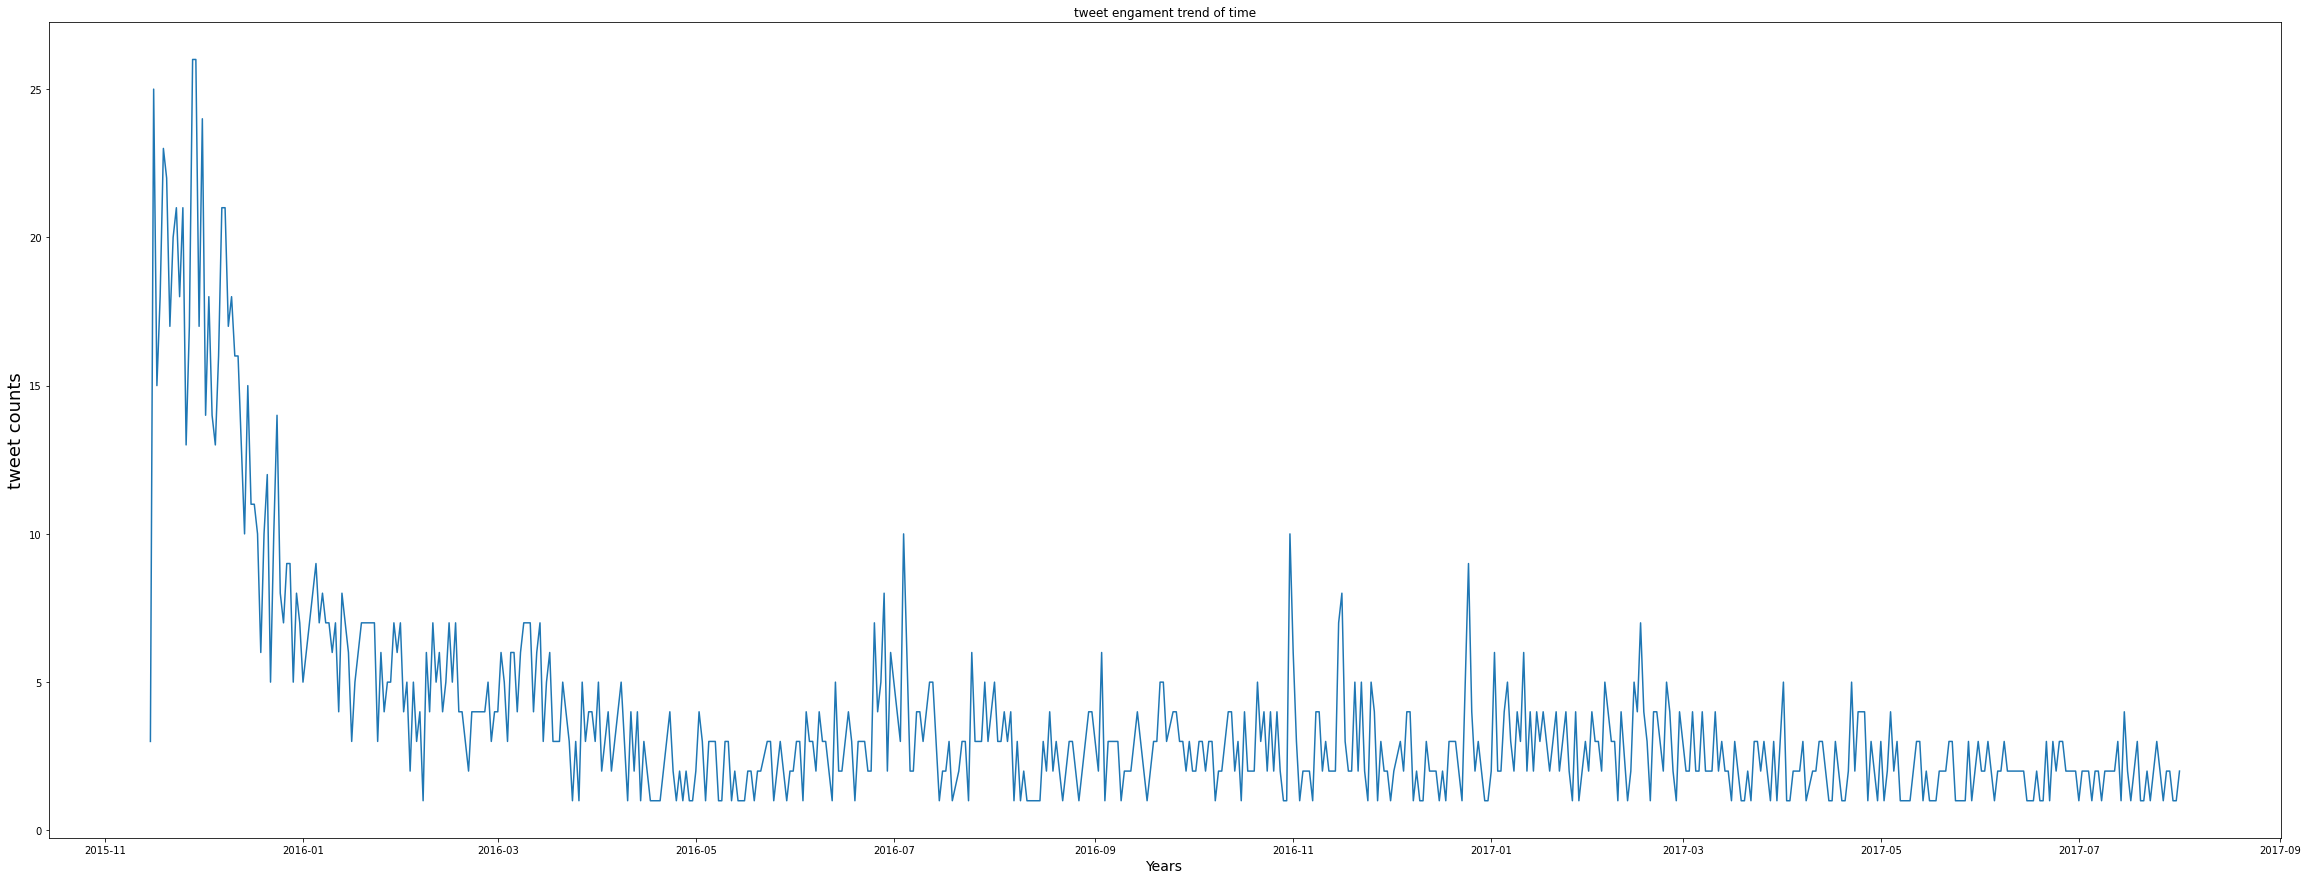

In [149]:
trend_data.plot.line(figsize=(40,15), title='tweet engament trend of time')
plt.xlabel('Years', fontsize=14)
plt.ylabel('tweet counts', fontsize=18)

In [157]:
merged4.timestamp_time

0       16:23:56
1       00:17:27
2       00:18:03
3       15:58:51
4       16:00:24
          ...   
2351    00:24:50
2352    00:04:52
2353    23:21:54
2354    23:05:30
2355    22:32:08
Name: timestamp_time, Length: 2356, dtype: object

In [173]:
top_10_breeds_count= merged4[merged4.p1 != 'none'].p1.value_counts().head(20)
print('breed and number of tweets')
print('--------------------------------')
print(top_10_breeds_count)

breed and number of tweets
--------------------------------
golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
web_site                      19
Cardigan                      19
Name: p1, dtype: int64


In [182]:
merged4.jpg_url

0       https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1       https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2       https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3       https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4       https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg
                             ...                       
2351    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg
2352    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg
2353    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg
2354    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg
2355    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg
Name: jpg_url, Length: 2356, dtype: object

In [185]:
## convert url into list, so we can present the image into columns
img_link=merged4['jpg_url'].to_list()

In [187]:
merged4['dog_img']=img_link

In [195]:
merged4.head(1)

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count_y,retweet_count_y,dog_img
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,False,bagel,0.085851,False,banana,0.07611,False,NaN,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg


In [ ]:
## convert url into image and attach into the column

In [196]:
def path_to_image_html(path):
    return '<img src="'+ path + '" width="60" >'

In [ ]:
merged4.to_html(escape=False, formatters=dict(dog_img=path_to_image_html))

In [205]:
merged4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tweet_id                 2356 non-null   object 
 1   in_reply_to_status_id_x  78 non-null     float64
 2   in_reply_to_user_id_x    78 non-null     float64
 3   timestamp                2356 non-null   object 
 4   source_x                 2356 non-null   object 
 5   text                     2356 non-null   object 
 6   expanded_urls            2297 non-null   object 
 7   rating_numerator         2356 non-null   int64  
 8   rating_denominator       2356 non-null   int64  
 9   name                     2356 non-null   object 
 10  doggo                    2356 non-null   object 
 11  floofer                  2356 non-null   object 
 12  pupper                   2356 non-null   object 
 13  puppo                    2356 non-null   object 
 14  timestamp_date          

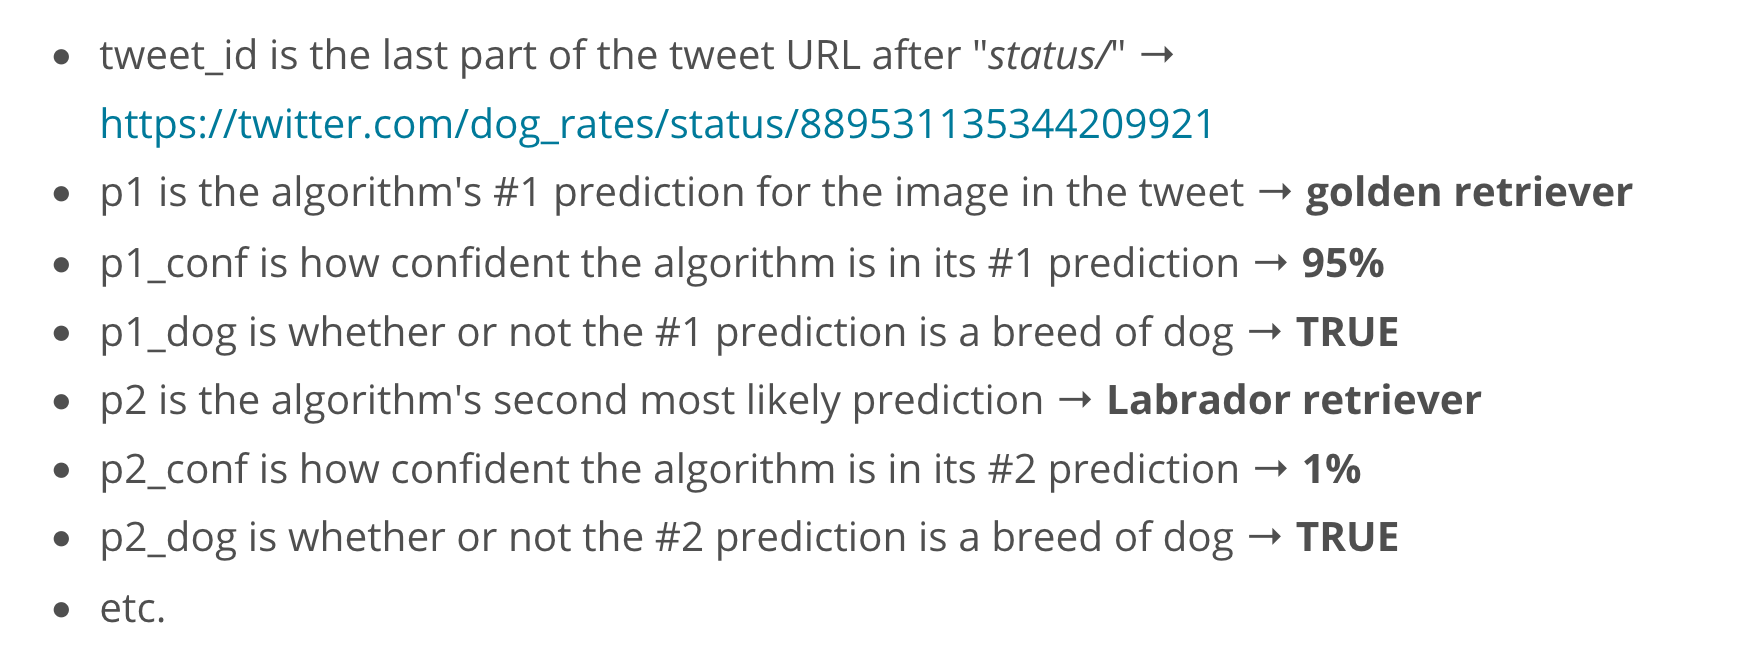

In [207]:
Image(filename='/Users/balance/Desktop/23.png')

In [208]:
merged4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tweet_id                 2356 non-null   object 
 1   in_reply_to_status_id_x  78 non-null     float64
 2   in_reply_to_user_id_x    78 non-null     float64
 3   timestamp                2356 non-null   object 
 4   source_x                 2356 non-null   object 
 5   text                     2356 non-null   object 
 6   expanded_urls            2297 non-null   object 
 7   rating_numerator         2356 non-null   int64  
 8   rating_denominator       2356 non-null   int64  
 9   name                     2356 non-null   object 
 10  doggo                    2356 non-null   object 
 11  floofer                  2356 non-null   object 
 12  pupper                   2356 non-null   object 
 13  puppo                    2356 non-null   object 
 14  timestamp_date          

In [209]:
merged5=merged4[['tweet_id','dog_img','timestamp_date','rating_numerator','rating_denominator_10','name','p1','p1_conf'
                ,'p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog','favorite_count_y']]

In [ ]:
from IPython.core.display import HTML
HTML(merged5.to_html(escape=False, formatters=dict(dog_img=path_to_image_html)))

In [237]:
merged5.p1.value_counts()[:50]

golden_retriever                  150
Labrador_retriever                100
Pembroke                           89
Chihuahua                          83
pug                                57
chow                               44
Samoyed                            43
toy_poodle                         39
Pomeranian                         38
malamute                           30
cocker_spaniel                     30
French_bulldog                     26
miniature_pinscher                 23
Chesapeake_Bay_retriever           23
seat_belt                          22
Staffordshire_bullterrier          20
Siberian_husky                     20
German_shepherd                    20
web_site                           19
Cardigan                           19
Shetland_sheepdog                  18
teddy                              18
Eskimo_dog                         18
beagle                             18
Maltese_dog                        18
Lakeland_terrier                   17
Shih-Tzu    

In [228]:
merged5.p1.describe()

count                 2075
unique                 378
top       golden_retriever
freq                   150
Name: p1, dtype: object

In [241]:
merged5.p2.value_counts()[:50]

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Eskimo_dog                         27
collie                             27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
Samoyed                            20
toy_terrier                        20
chow                               20
malinois                           20
miniature_pinscher                 20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [240]:
merged5.p3.value_counts()[:50]

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
cocker_spaniel                    31
beagle                            31
Pekinese                          29
toy_poodle                        29
Pomeranian                        29
Great_Pyrenees                    27
Chesapeake_Bay_retriever          27
Pembroke                          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
L

In [225]:
### 0.588
merged5.p1_conf.describe()

count    2075.000000
mean        0.594548
std         0.271174
min         0.044333
25%         0.364412
50%         0.588230
75%         0.843855
max         1.000000
Name: p1_conf, dtype: float64

In [226]:
## 1.181
merged5.p2_conf.describe()

count    2.075000e+03
mean     1.345886e-01
std      1.006657e-01
min      1.011300e-08
25%      5.388625e-02
50%      1.181810e-01
75%      1.955655e-01
max      4.880140e-01
Name: p2_conf, dtype: float64

In [227]:
## 4.944
merged5.p3_conf.describe()

count    2.075000e+03
mean     6.032417e-02
std      5.090593e-02
min      1.740170e-10
25%      1.622240e-02
50%      4.944380e-02
75%      9.180755e-02
max      2.734190e-01
Name: p3_conf, dtype: float64

In [248]:
merged5.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [ ]:
## df[(df.a != -1) & (df.b != -1)]